In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Regression using KNNClassifier


## Load the data

In [4]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y = True)

In [5]:
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size = 0.3 ,random_state = 8)


## Training


In [6]:
pipe_reg_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors = 2))
pipe_reg_knn.fit(x_train, y_train)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [7]:
pipe_reg_knn.score(x_train,y_train)

0.8897548288481948

In [8]:
y_pred = pipe_reg_knn.predict(x_test)
mean_squared_error(y_test, y_pred,squared = False)

0.6767822465759739

## Model Selection


In [9]:
param_grid = {'kneighborsregressor__n_neighbors':list(range(1,31))}

In [10]:
knn_grid_cv = GridSearchCV(pipe_reg_knn ,param_grid = param_grid,
                           cv = 10,
                           n_jobs =1,
                           return_train_score = True)

knn_grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor(n_neighbors=2))]),
             n_jobs=1,
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30]},
             return_train_score=True)

In [11]:
best_est =knn_grid_cv.best_estimator_

## Evaluation

In [12]:
y_pred_ = best_est.predict(x_test)
mean_squared_error(y_test,y_pred_,squared = False)

0.6255268557053962

#Softmax regression Regression wuth MNIST

##Import
Lets import neæssary libraries for data loading, preprocessing, model training, selection and evaluation.
In addition, we also import basic python libraries for data handling and plotting.
We the random seed to 42.


In [13]:
import numpy as np
from pprint import pprint

#to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#To plot pretty figures
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#global settings

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
mpl.rc('figure', figsize = (8,6))

## Data Loading 
Let's load the MNIST dataset for handwritten digit recognition from OpenML

In [14]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

## Training-test split

In [15]:
X = X.to_numpy()
y = y.to_numpy()
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Model Building

We scale the input features with `standardscaler` and use `LogisticRegression` estimator with `multi_class` parameter set to
`multinomial` and using `sag` solver.


In [16]:
pipe  = Pipeline([('scaler', StandardScaler()),
                   ('logreg', LogisticRegression(multi_class = 'multinomial',
                                                solver = 'sag'))])
pipe.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

`Multi_class = multinomial `makes sure that we are using softmax regression\
What solver = 'sag' does?\
**SAG** method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method's iteration cost is independent of the number of terms in the sum. However, by incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate than black-box SG methods.

It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.


In [17]:
pipe[-1].coef_.shape

(10, 784)

In [18]:
y.shape

(70000,)

## Model Evaluation
Lets get a classification report on the test set and also display a confusion matrix

In [19]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



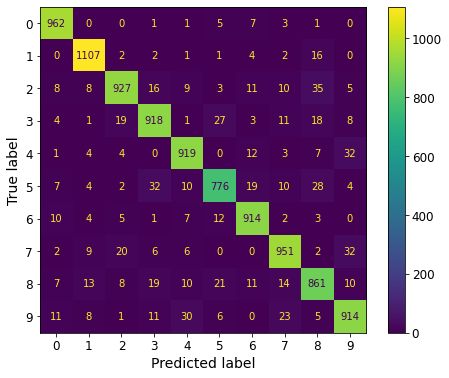

In [20]:
ConfusionMatrixDisplay.from_estimator(pipe,x_test,y_test)

## Using LogisticRegressionCV

In [21]:
'''from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score ,average = 'micro')

pipe_cv = Pipeline([('scaler', StandardScaler()),
                    ('logreg', LogisticRegressionCV(
                        cv = 5,
                        scoring = scorer,
                        solver = 'sag',
                        max_iter = 100,
                        multi_class = 'multinomial'
                    ))])

pipe_cv.fit(x_train,y_train)'''

"from sklearn.metrics import make_scorer\nfrom sklearn.metrics import f1_score\nscorer = make_scorer(f1_score ,average = 'micro')\n\npipe_cv = Pipeline([('scaler', StandardScaler()),\n                    ('logreg', LogisticRegressionCV(\n                        cv = 5,\n                        scoring = scorer,\n                        solver = 'sag',\n                        max_iter = 100,\n                        multi_class = 'multinomial'\n                    ))])\n\npipe_cv.fit(x_train,y_train)"

#KNN with MNIST

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate , cross_val_score, RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import learning_curve


## Load the Dataset

In [ ]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = X[:60000] ,X[60000:], y[:60000], y[60000:]

## Binary Classification

Change the labels to binary

In [ ]:
y_train_0 = -1 * np.ones(len(y_train))
y_test_0  = -1 * np.ones(len(y_test))

indx_0 = np.where(y_train == '0')
indx__0 = np.where(y_test == '0')

y_train_0[indx_0] = 1
y_test_0[indx__0] = 1
y_train_0.shape

(60000,)

In [ ]:
np.unique(y_train_0)

array([-1.,  1.])

##Data Visualization in Lower dimension
* Let us apply PCA on the datapoints and reduce the dimentions to 2D and then to 3D
* This will give us some rough idea about the points in $R^{784}$
* One Interesting thing to look at is the change in the magnitude of the data points before and after applying PCA.
* we use the variables for pre-processing the samples alone and for classification.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components= 2))
x_train_pca_2d = pipe_pca_2d.fit_transform(x_train)

In [ ]:
cmap = mpl.colors.ListedColormap(['p' , 'b'])
plt.figure(figsize=(8,6))
sns.scatterplot(x = x_train_pca_2d[:,0], y = x_train_pca_2d[:,1] ,hue = y_train_0 , palette= cmap)
plt.show()

ValueError: ignored

<Figure size 576x432 with 0 Axes>

In [ ]:
pipe_pca_3d = make_pipeline(MinMaxScaler(), PCA(n_components = 3))
x_train_pca_3d = pipe_pca_3d.fit_transform(x_train)

In [ ]:
x_train_pca_3d[:,0][:5]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x = x_train_pca_3d[:,0],
                    y = x_train_pca_3d[:,1],
                    z = x_train_pca_3d[:,2],
                    color = y_train_0,
                    color_discrete_map = cmap,
                    opacity = 0.5)
fig.show()
                    


## KNN Classifier

## Algorithm
1. Set k to desired value, i.e. how many neighbours should be allowed to participate in prediction.
2. Calculate the distance between the new example and every example from the data. Thus create a distance vector.
3. Get indices of nearest k neighbours
4. Get the labels of the selected k entries
5. If it is a classification task, return the majority class by computing mode of the k labels.
* To understand the working of sklearn built-in functions, we create a KNN classifier model with k = 3 and consider a smaller number
of samples from training and testing set.
* The KNeighborsC1assifier creates a classifier instance. There are many optional arguments such as `n_neighbors`, `metric`,`weights`.. that can be set to suitable values while creating an instance.


In [ ]:
pipe_clf_pca_2d = make_pipeline(pipe_pca_2d, KNeighborsClassifier(n_neighbors = 3))
pipe_clf_pca_2d.fit(x_train, y_train_0)

In [ ]:
y_hat_0 = pipe_clf_pca_2d.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_0)

In [ ]:
print(classification_report(y_test_0, y_hat_0))

## KNN without PCA

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(), 
                         KNeighborsClassifier(n_neighbors = 1))


In [ ]:

grid_k = {'kneighborsclassifier__n_neighbors':[1,3,5,7,9,11]}
knn_cv = GridSearchCV(pipe_knn,
                      param_grid = grid_k,
                      scoring = 'precision',
                      cv = 5)
knn_cv.fit(x_train,y_train_0)
print(knn_cv)

In [ ]:
y_pred = knn_cv.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_0, y_pred)

In [ ]:
print(classification_report(y_test_0, y_pred))

In [ ]:
pipe_knn.fit(x_train, y_train)  #reuse the pipe created earlier
y_hat = pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [ ]:
print(classification_report(y_hat,y_test))